In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

(1200, 1920, 3)
<class 'numpy.ndarray'>


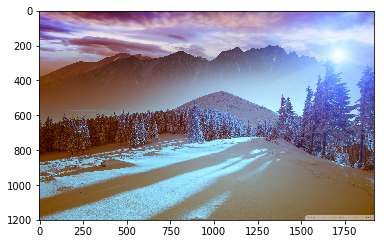

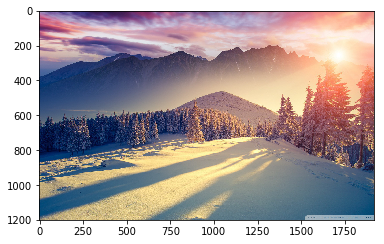

In [20]:
ig=cv2.imread('im.jpg')
print(ig.shape)
print(type(ig))
ig2=cv2.cvtColor(ig,cv2.COLOR_BGR2RGB)
img=cv2.resize(ig2,(200,200))            ##resizing the image
plt.imshow(ig) 
plt.show()
plt.imshow(ig2)
plt.show()
data=img.reshape((40000,3))


In [28]:
km= KMeans(8)
km.fit(data)
cluster_centers = np.array(km.cluster_centers_,dtype=np.uint8)
cluster_centers
freq=np.unique(km.labels_,  return_counts=True)[1]
print (freq)
print (km.labels_.shape)
freq=freq/float(len(km.labels_))
print (freq)

[6199 6135 5725 4949 3369 3388 3875 6360]
(40000,)
[ 0.154975  0.153375  0.143125  0.123725  0.084225  0.0847    0.096875
  0.159   ]


In [30]:
## combining data for palette
DOM_List=[]
for ix in range(km.n_clusters):
    item=[cluster_centers[ix],freq[ix]]
    DOM_List.append(item)
for v1,v2 in DOM_List:
    print (v1,v2)
new_DOM = sorted(DOM_List, key=lambda z:z[1], reverse=True)
for v1,v2 in new_DOM:
    print (v1,v2)

[187 144 128] 0.154975
[ 68  89 121] 0.153375
[236 197 147] 0.143125
[28 47 90] 0.123725
[194 163 178] 0.084225
[135  83  91] 0.0847
[244 221 195] 0.096875
[124 123 135] 0.159
[124 123 135] 0.159
[187 144 128] 0.154975
[ 68  89 121] 0.153375
[236 197 147] 0.143125
[28 47 90] 0.123725
[244 221 195] 0.096875
[135  83  91] 0.0847
[194 163 178] 0.084225


[[[ 131.  132.  120.]
  [ 131.  132.  120.]
  [ 131.  132.  120.]
  ..., 
  [   1.    1.    1.]
  [   1.    1.    1.]
  [   1.    1.    1.]]

 [[ 131.  132.  120.]
  [ 131.  132.  120.]
  [ 131.  132.  120.]
  ..., 
  [   1.    1.    1.]
  [   1.    1.    1.]
  [   1.    1.    1.]]

 [[ 131.  132.  120.]
  [ 131.  132.  120.]
  [ 131.  132.  120.]
  ..., 
  [   1.    1.    1.]
  [   1.    1.    1.]
  [   1.    1.    1.]]

 ..., 
 [[ 131.  132.  120.]
  [ 131.  132.  120.]
  [ 131.  132.  120.]
  ..., 
  [   1.    1.    1.]
  [   1.    1.    1.]
  [   1.    1.    1.]]

 [[ 131.  132.  120.]
  [ 131.  132.  120.]
  [ 131.  132.  120.]
  ..., 
  [   1.    1.    1.]
  [   1.    1.    1.]
  [   1.    1.    1.]]

 [[ 131.  132.  120.]
  [ 131.  132.  120.]
  [ 131.  132.  120.]
  ..., 
  [   1.    1.    1.]
  [   1.    1.    1.]
  [   1.    1.    1.]]]


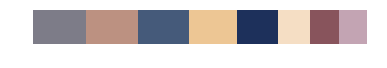

In [34]:
palette = np.ones((100,1000,3))
start=0
for cx in range(km.n_clusters):
    width= int(palette.shape[1]*new_DOM[cx][1])
    end = start + width
    palette[:, start:end, :] = 255 - new_DOM[cx][0]
    start = end
    plt.axis("off")
print(palette)
plt.imshow(palette)
plt.show()